$\textbf{PROGRAMMING ASSIGNMENT}$
---
# Support Vector Machines 
## Instructions
1. Use any dataset from https://archive.ics.uci.edu/datasets?Task=Clustering&skip=0&take=10&sort=desc&orderBy=NumHits&search=&Area=Biology
2. Each student should have a unique dataset otherwise no points will be given, so you need to discuss with your classmate.

In [30]:
# Library Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC

In [23]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_original = fetch_ucirepo(id=15) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_original.data.features 
y = breast_cancer_wisconsin_original.data.targets 
  
# metadata 
print(breast_cancer_wisconsin_original.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_original.variables) 

{'uci_id': 15, 'name': 'Breast Cancer Wisconsin (Original)', 'repository_url': 'https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original', 'data_url': 'https://archive.ics.uci.edu/static/public/15/data.csv', 'abstract': 'Original Wisconsin Breast Cancer Database', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 699, 'num_features': 9, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Class'], 'index_col': ['Sample_code_number'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1990, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5HP4Z', 'creators': ['WIlliam Wolberg'], 'intro_paper': None, 'additional_info': {'summary': "Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, having been removed fro

In [24]:
# Combine X and y into a single DataFrame
data = pd.concat([X, y], axis=1)
print(data)

     Clump_thickness  Uniformity_of_cell_size  Uniformity_of_cell_shape  \
0                  5                        1                         1   
1                  5                        4                         4   
2                  3                        1                         1   
3                  6                        8                         8   
4                  4                        1                         1   
..               ...                      ...                       ...   
694                3                        1                         1   
695                2                        1                         1   
696                5                       10                        10   
697                4                        8                         6   
698                4                        8                         8   

     Marginal_adhesion  Single_epithelial_cell_size  Bare_nuclei  \
0                    1         

**TASK: Take 10 moderately sized subsamples your dataset and create a correlation plot for each subsample**

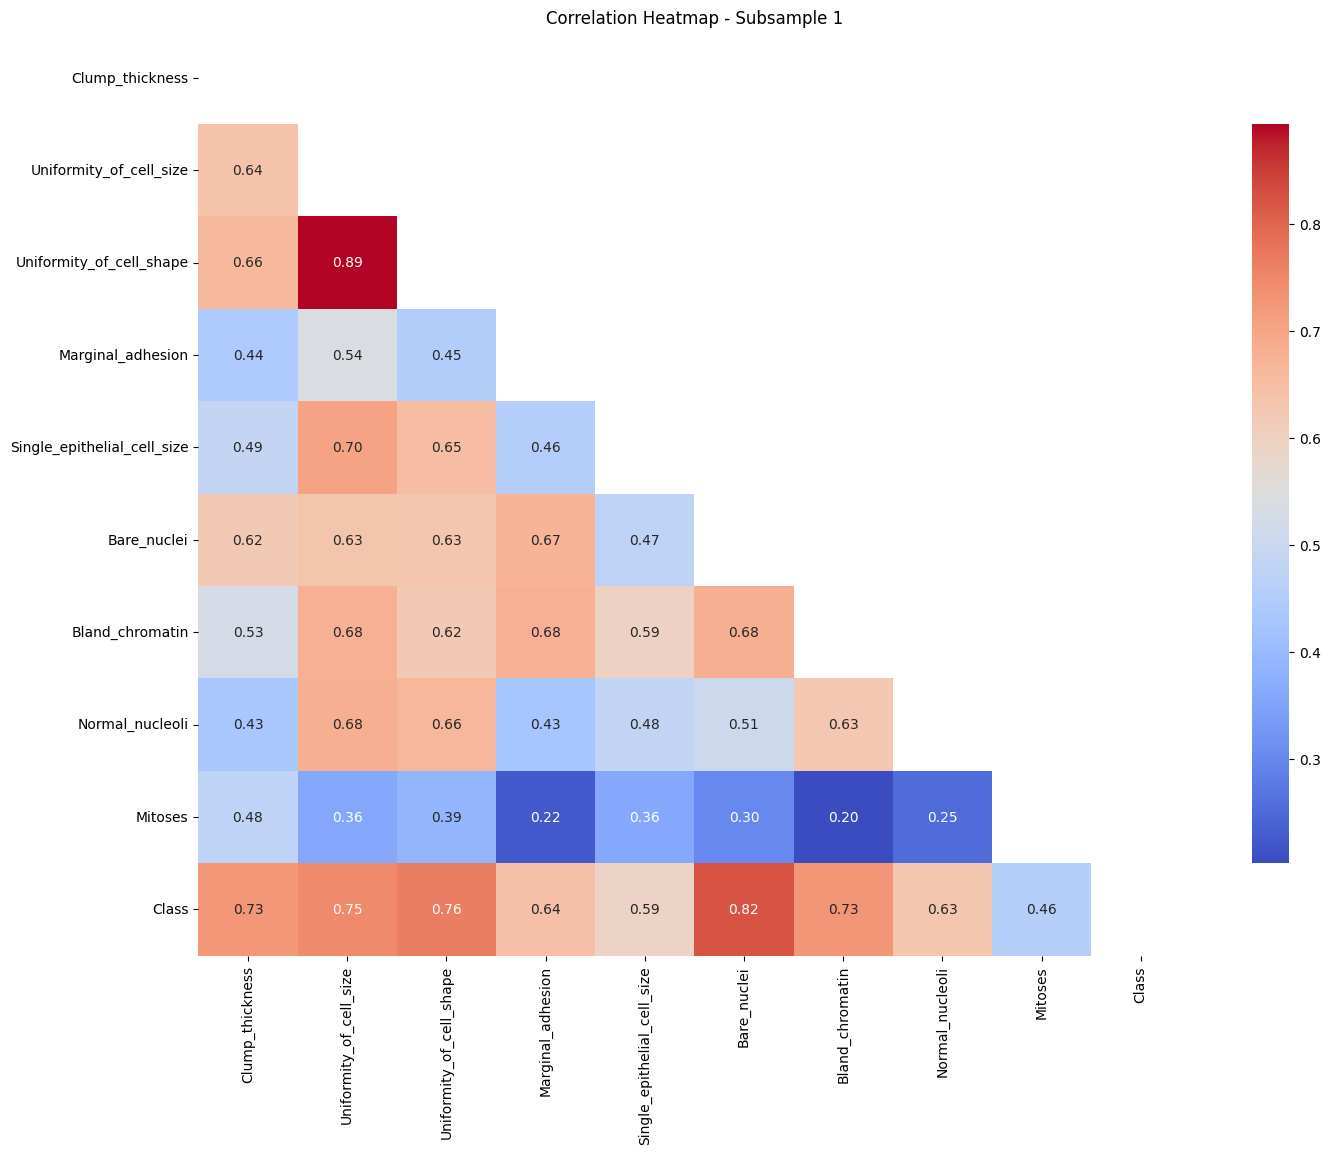

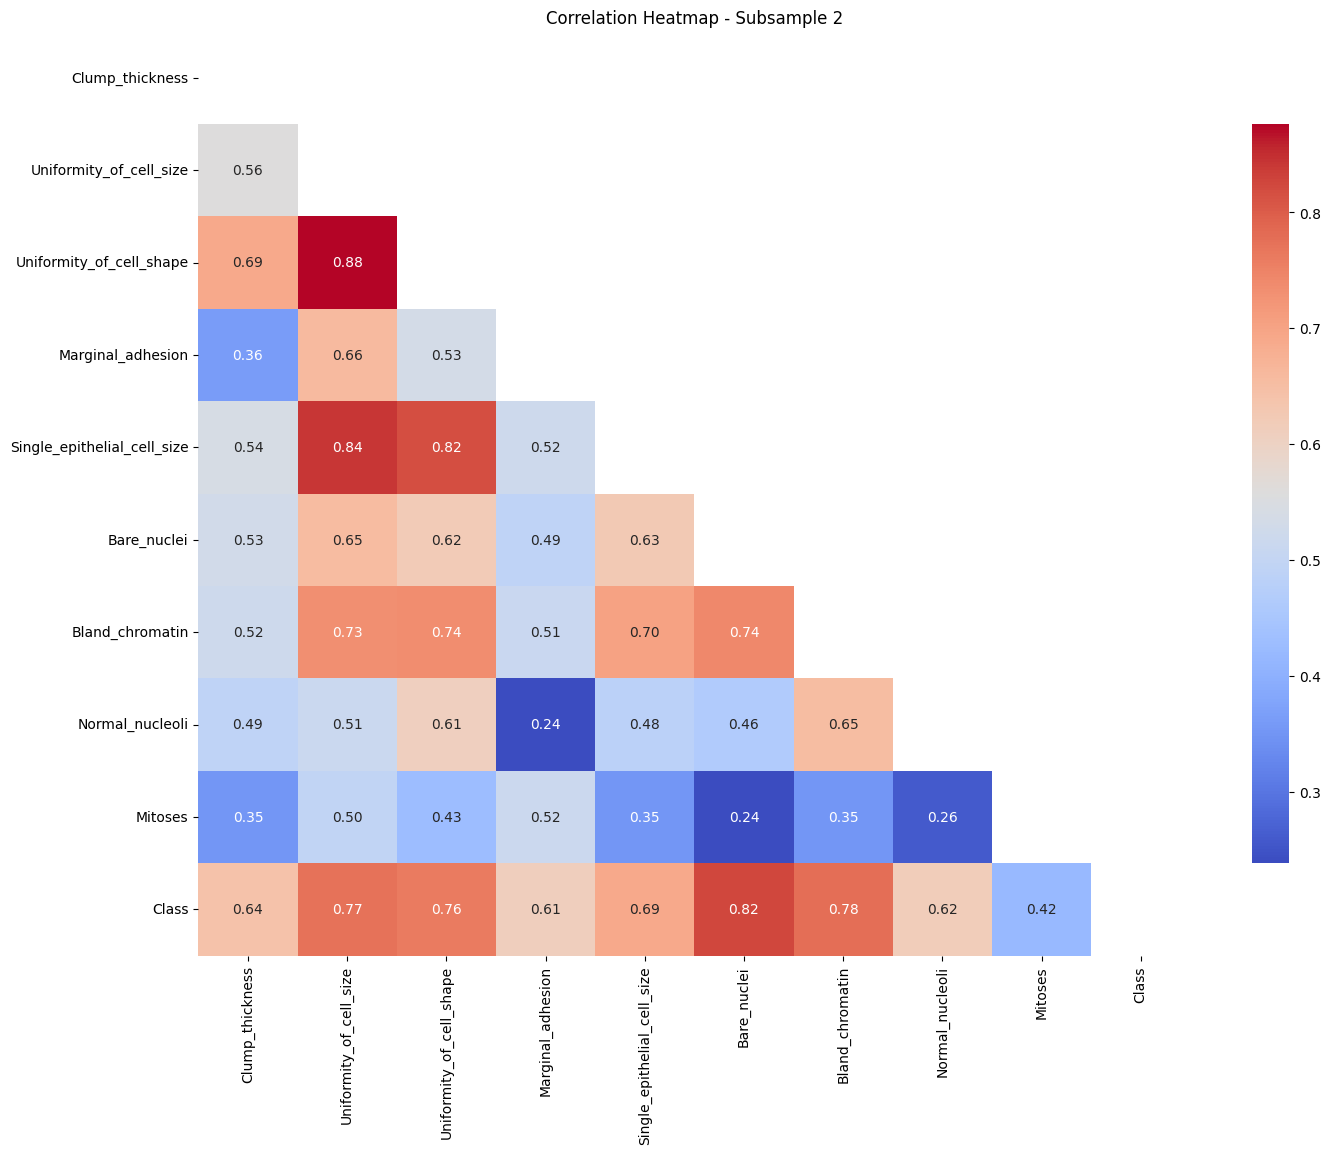

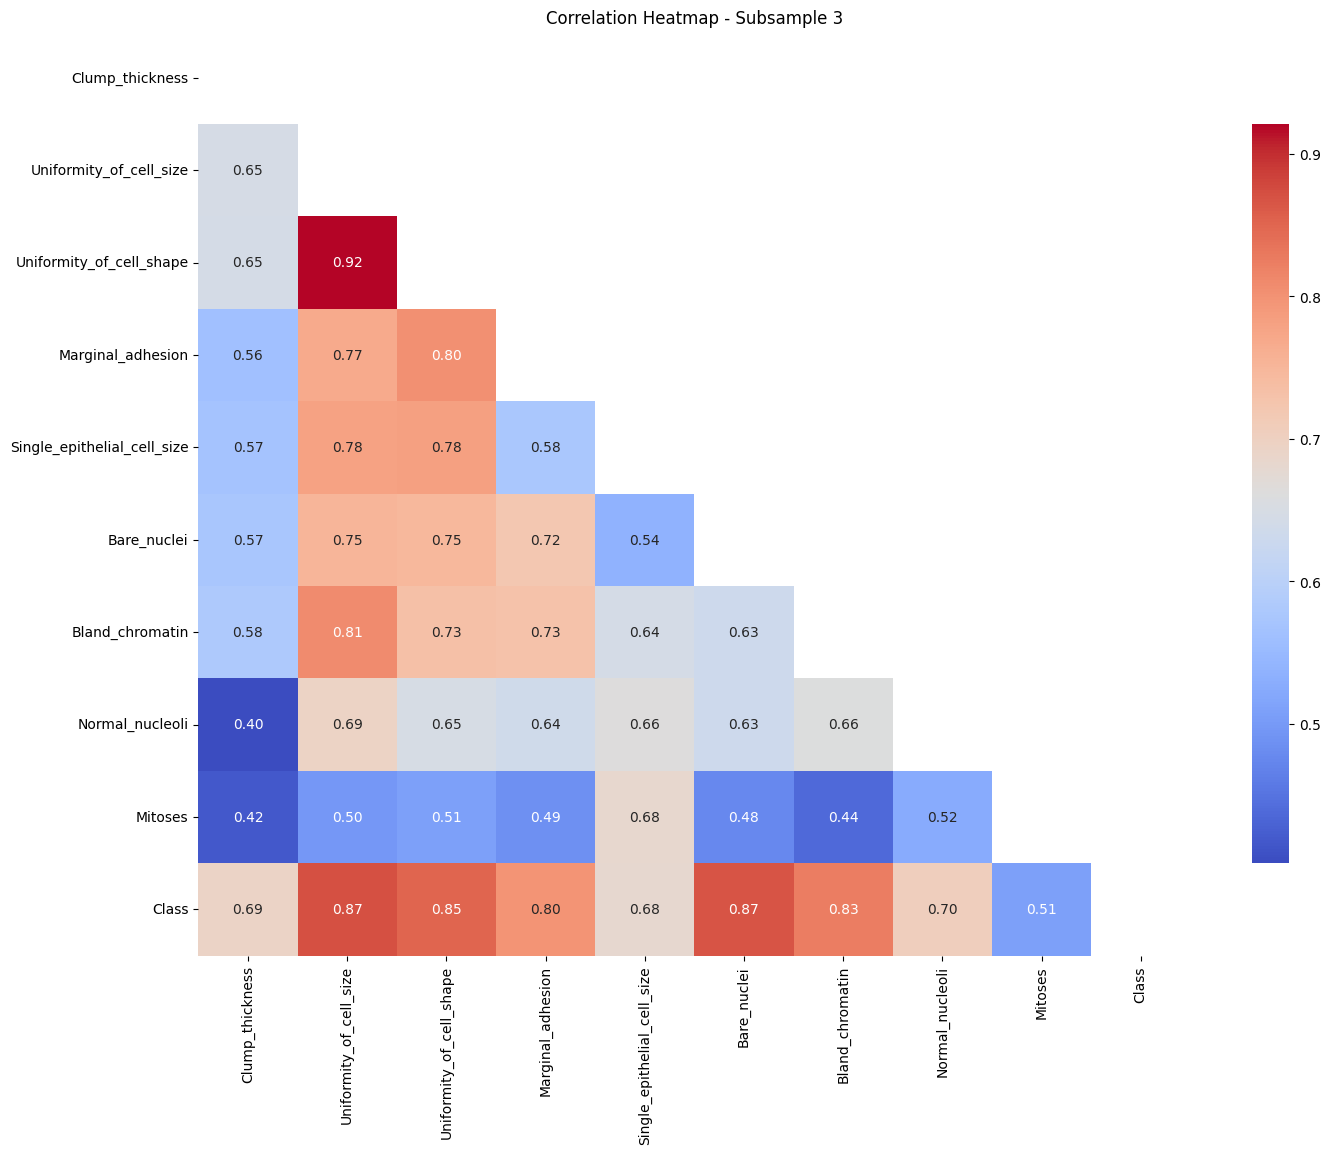

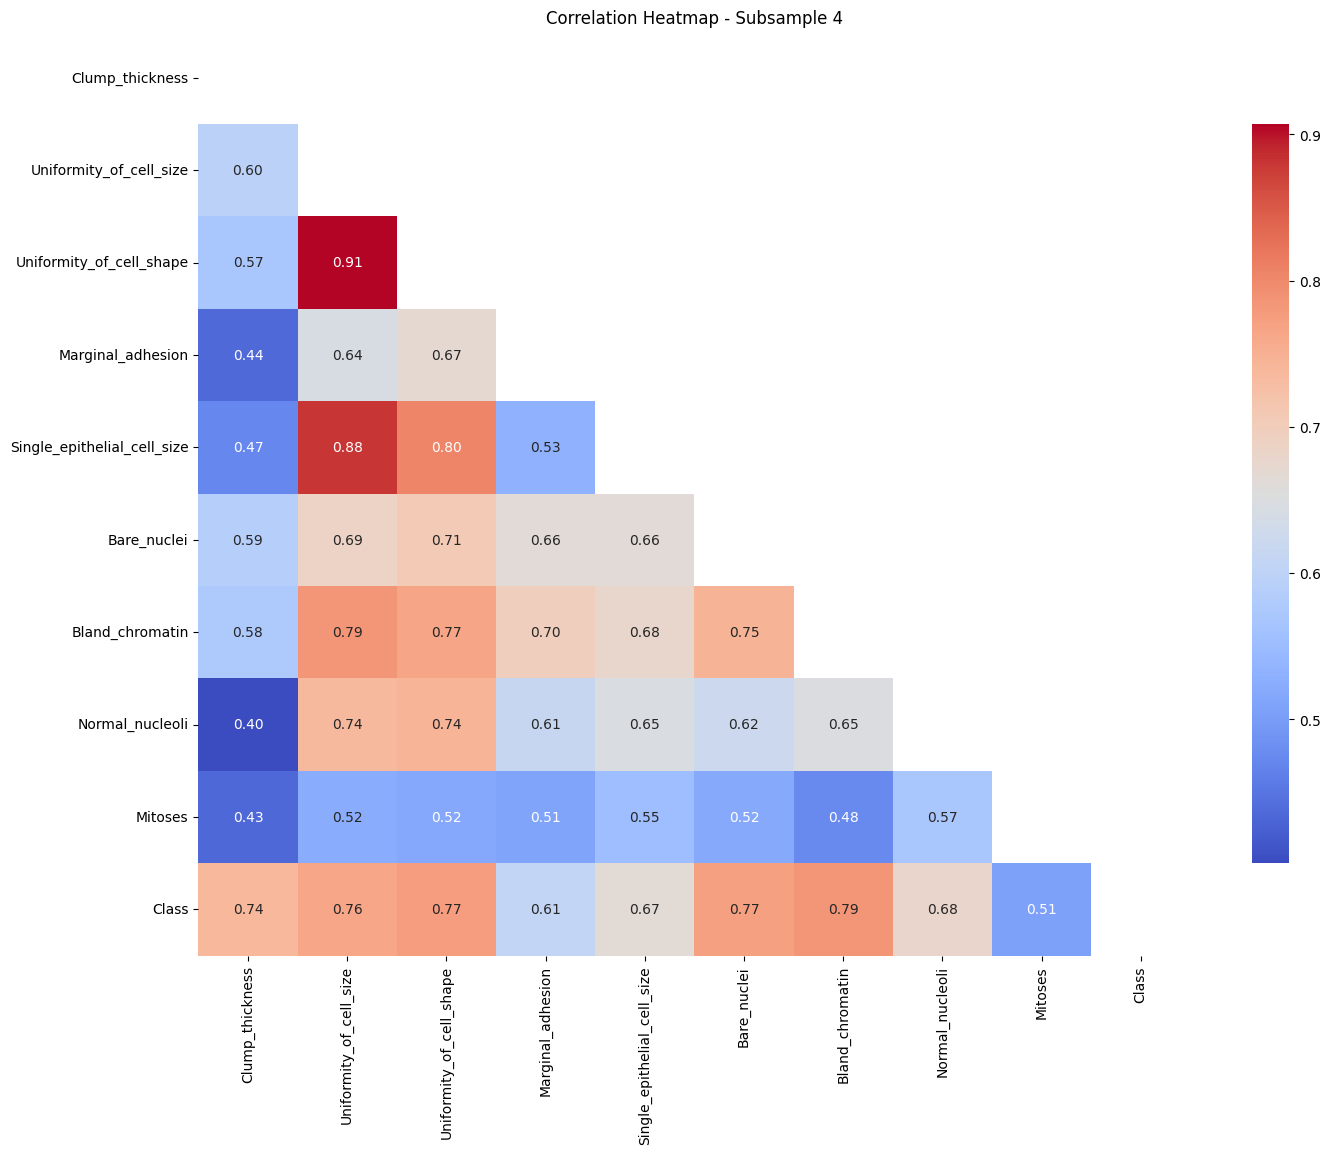

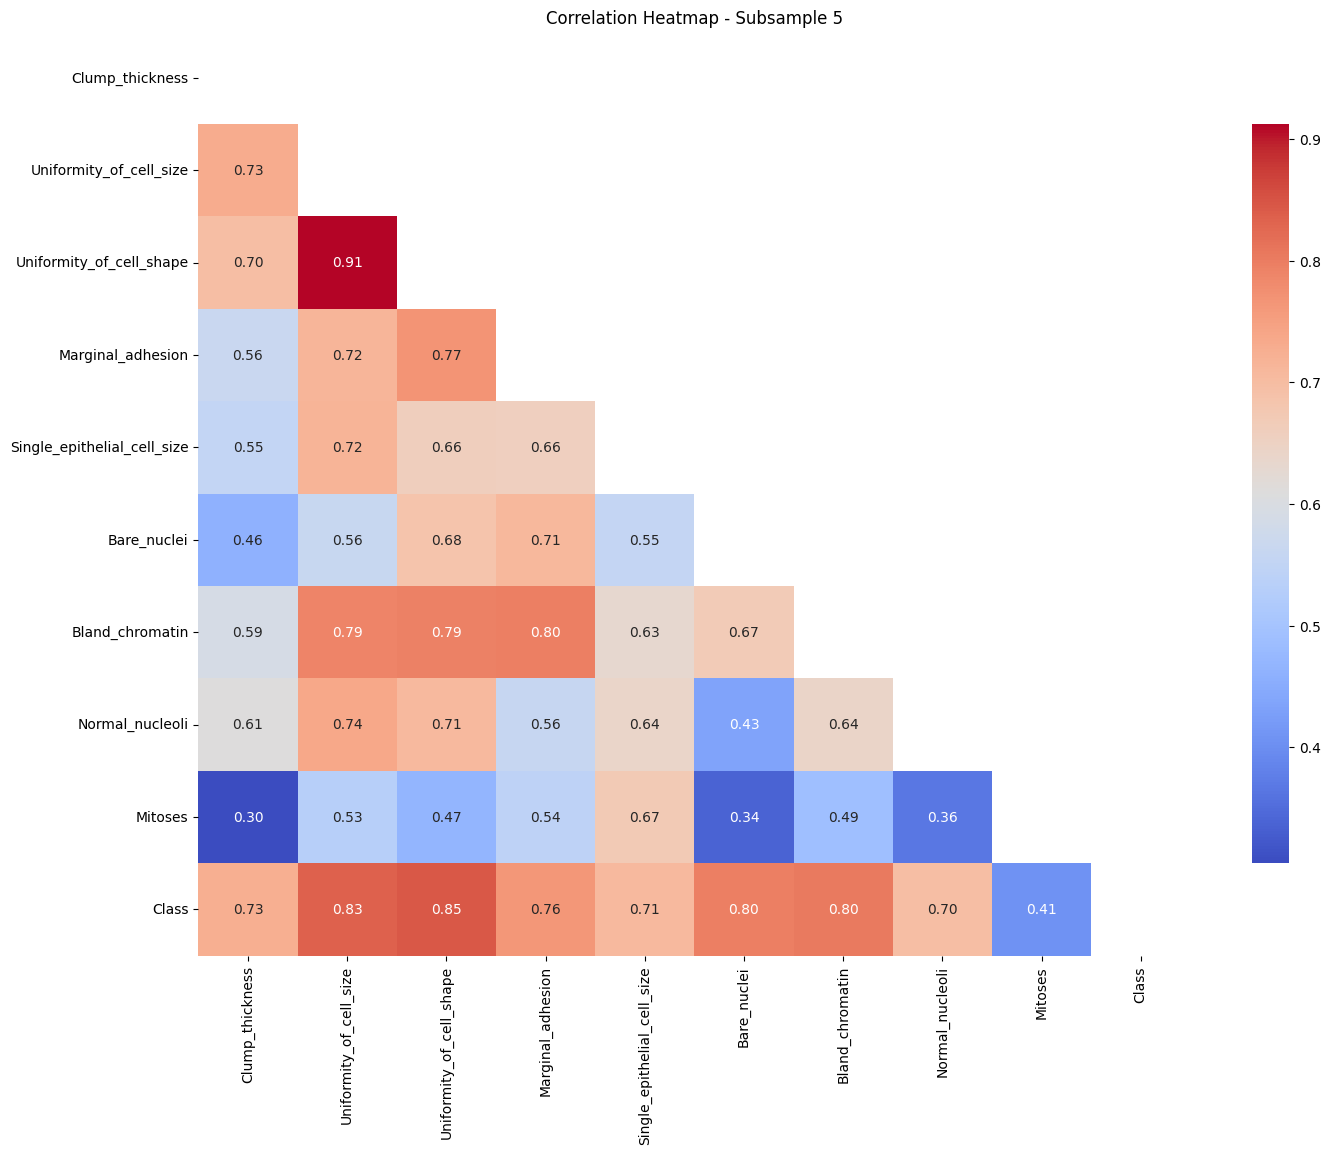

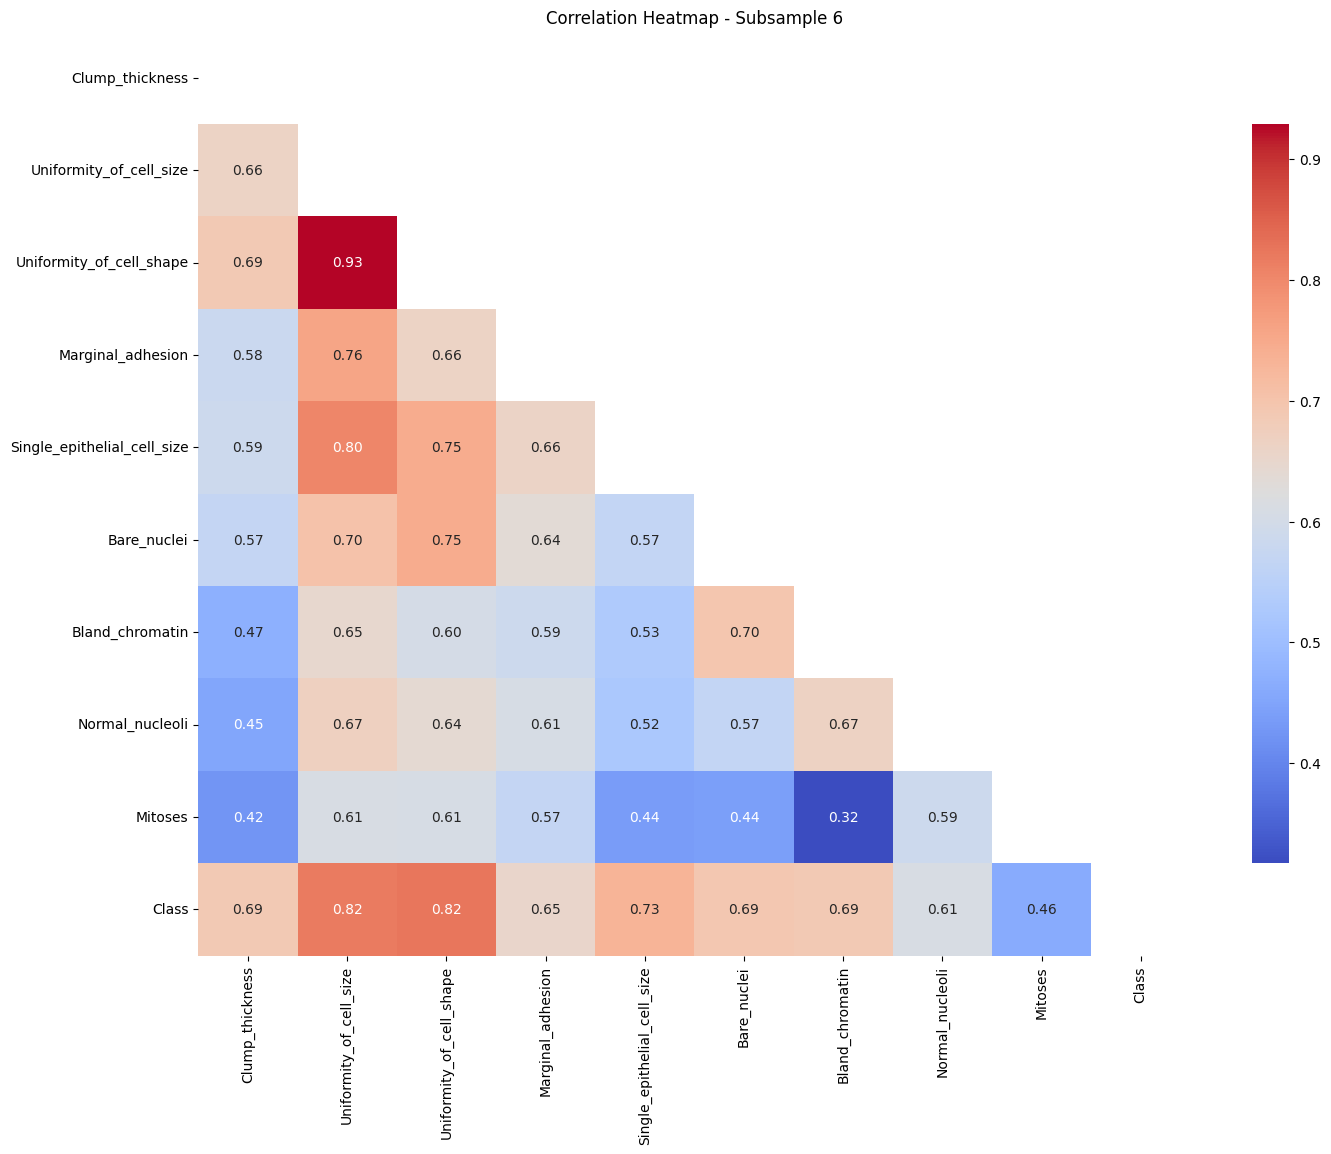

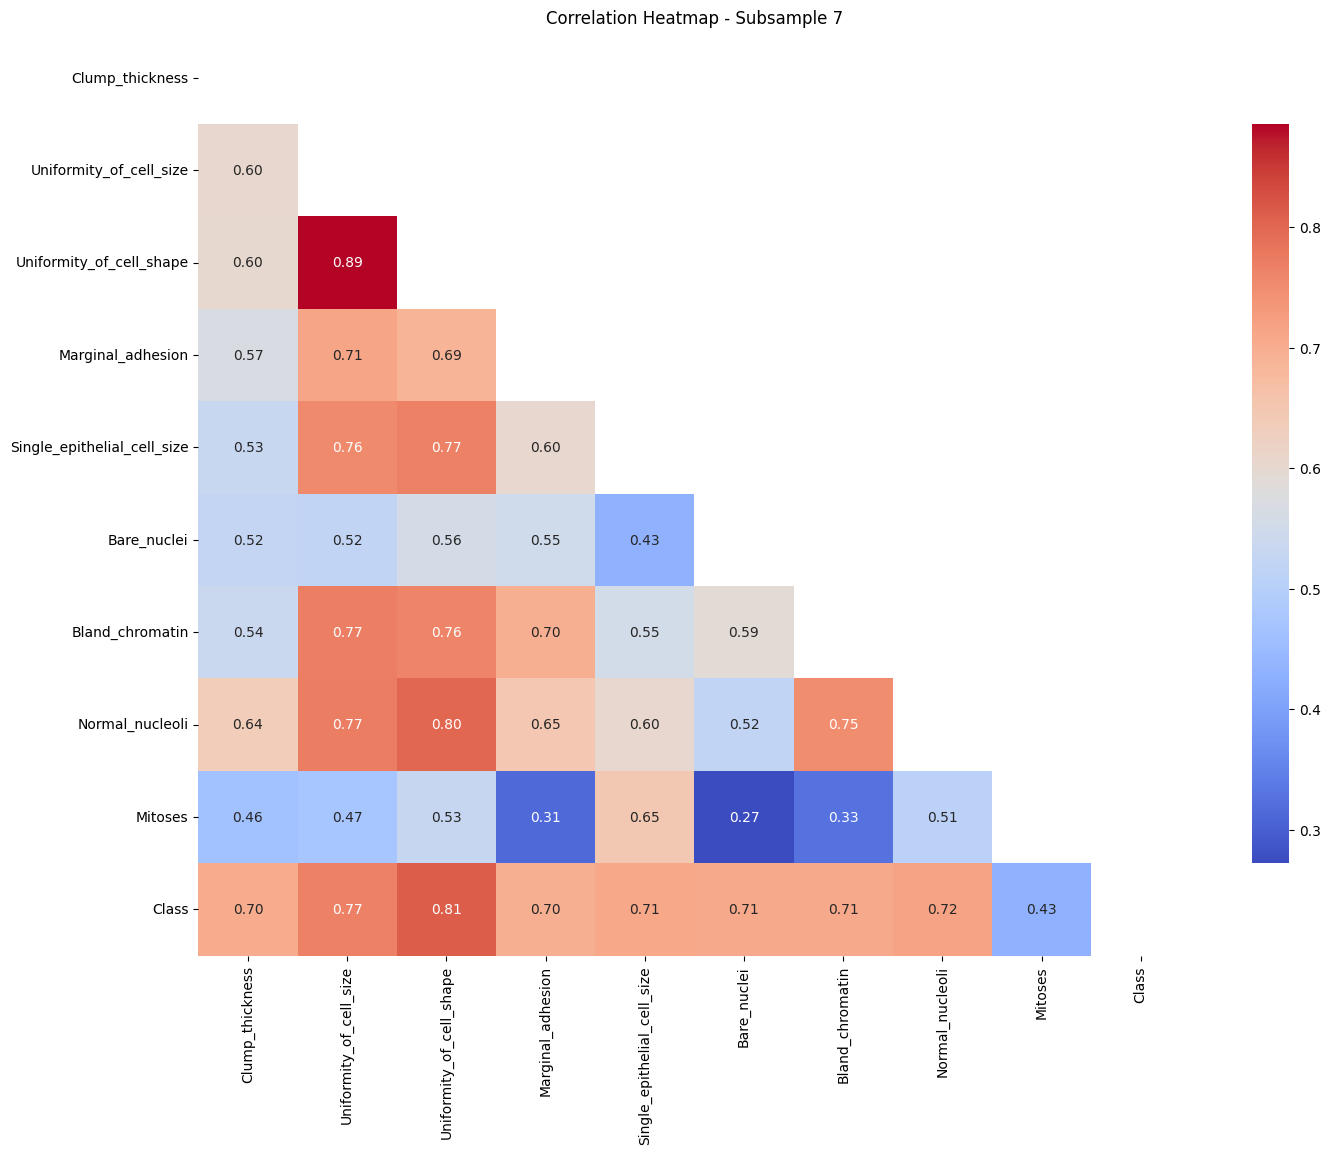

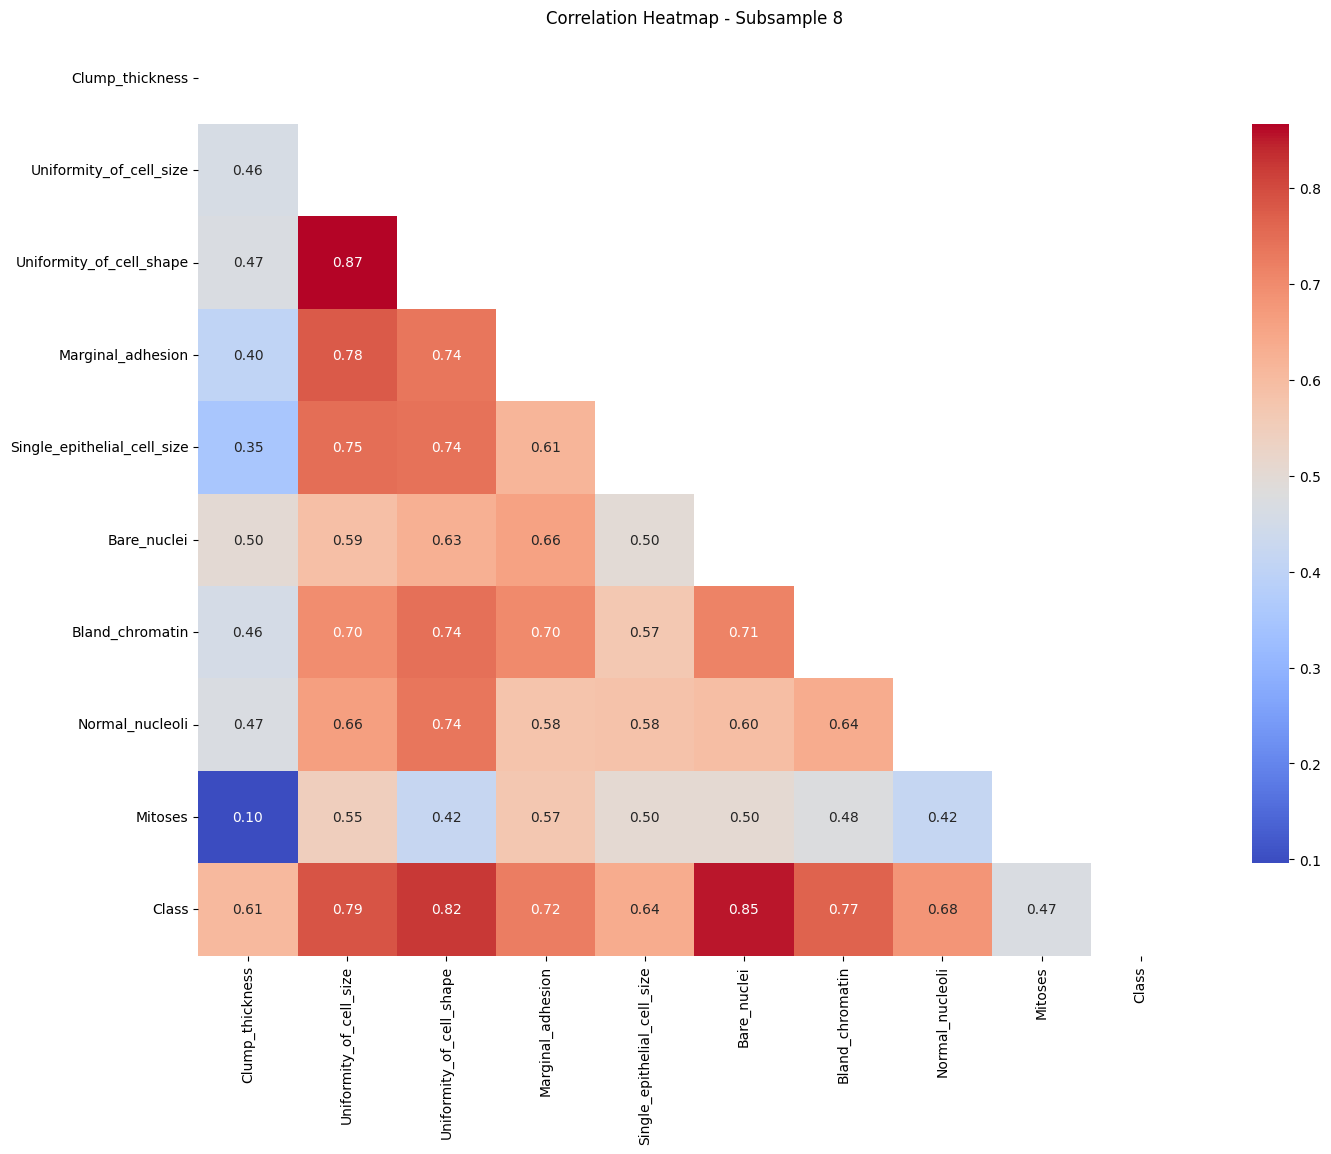

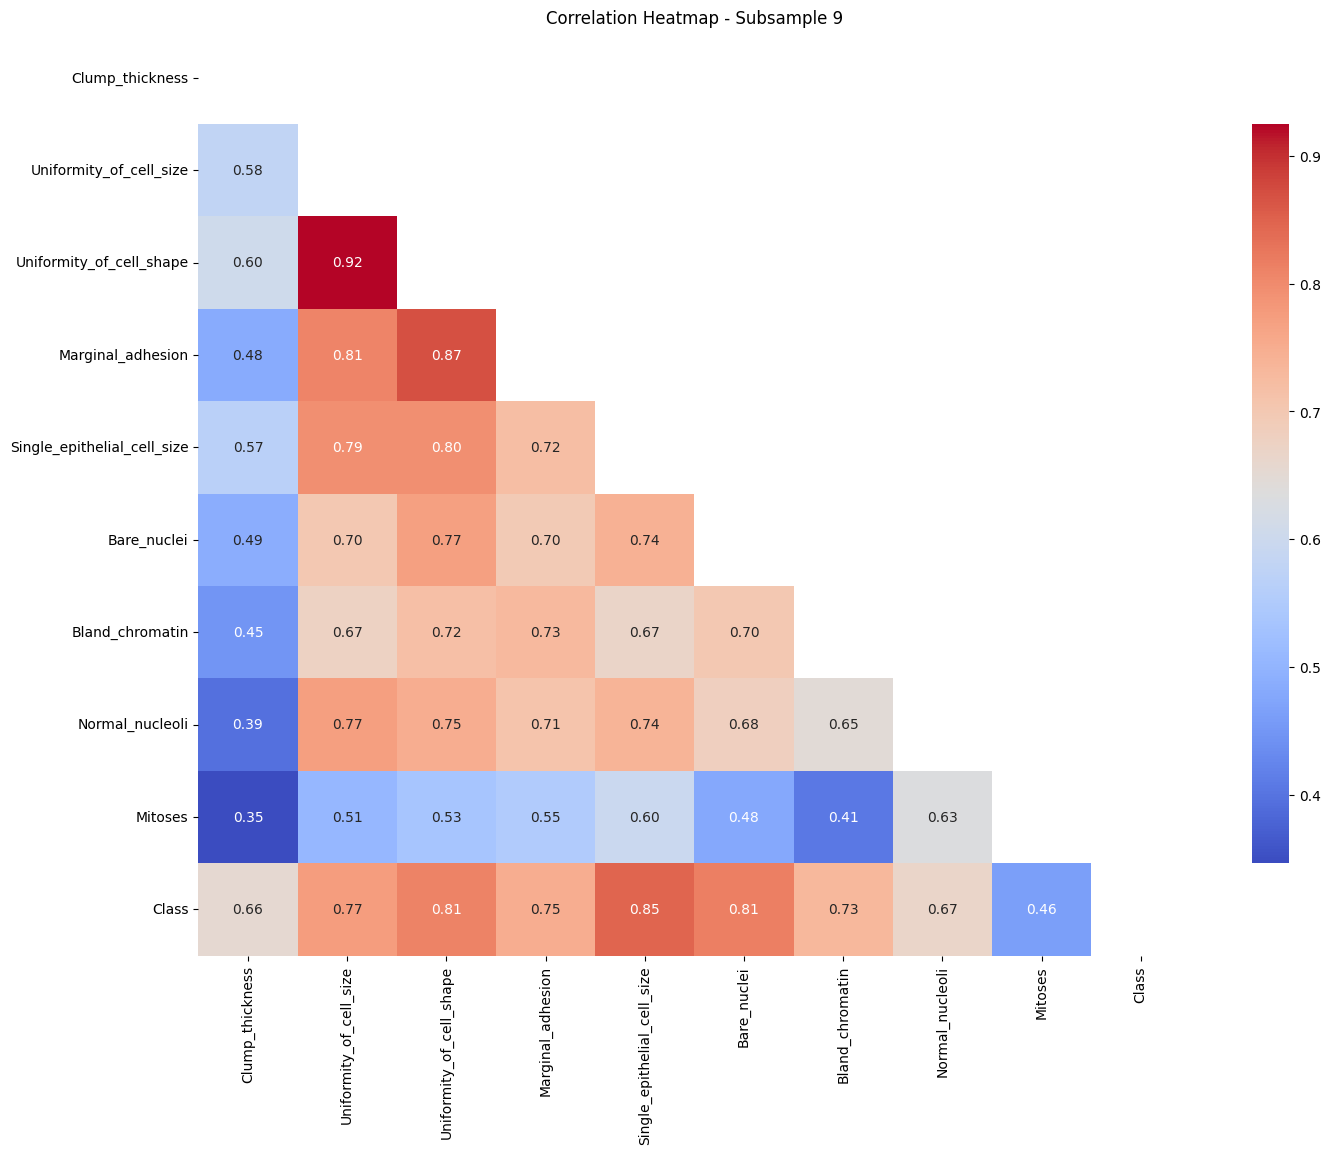

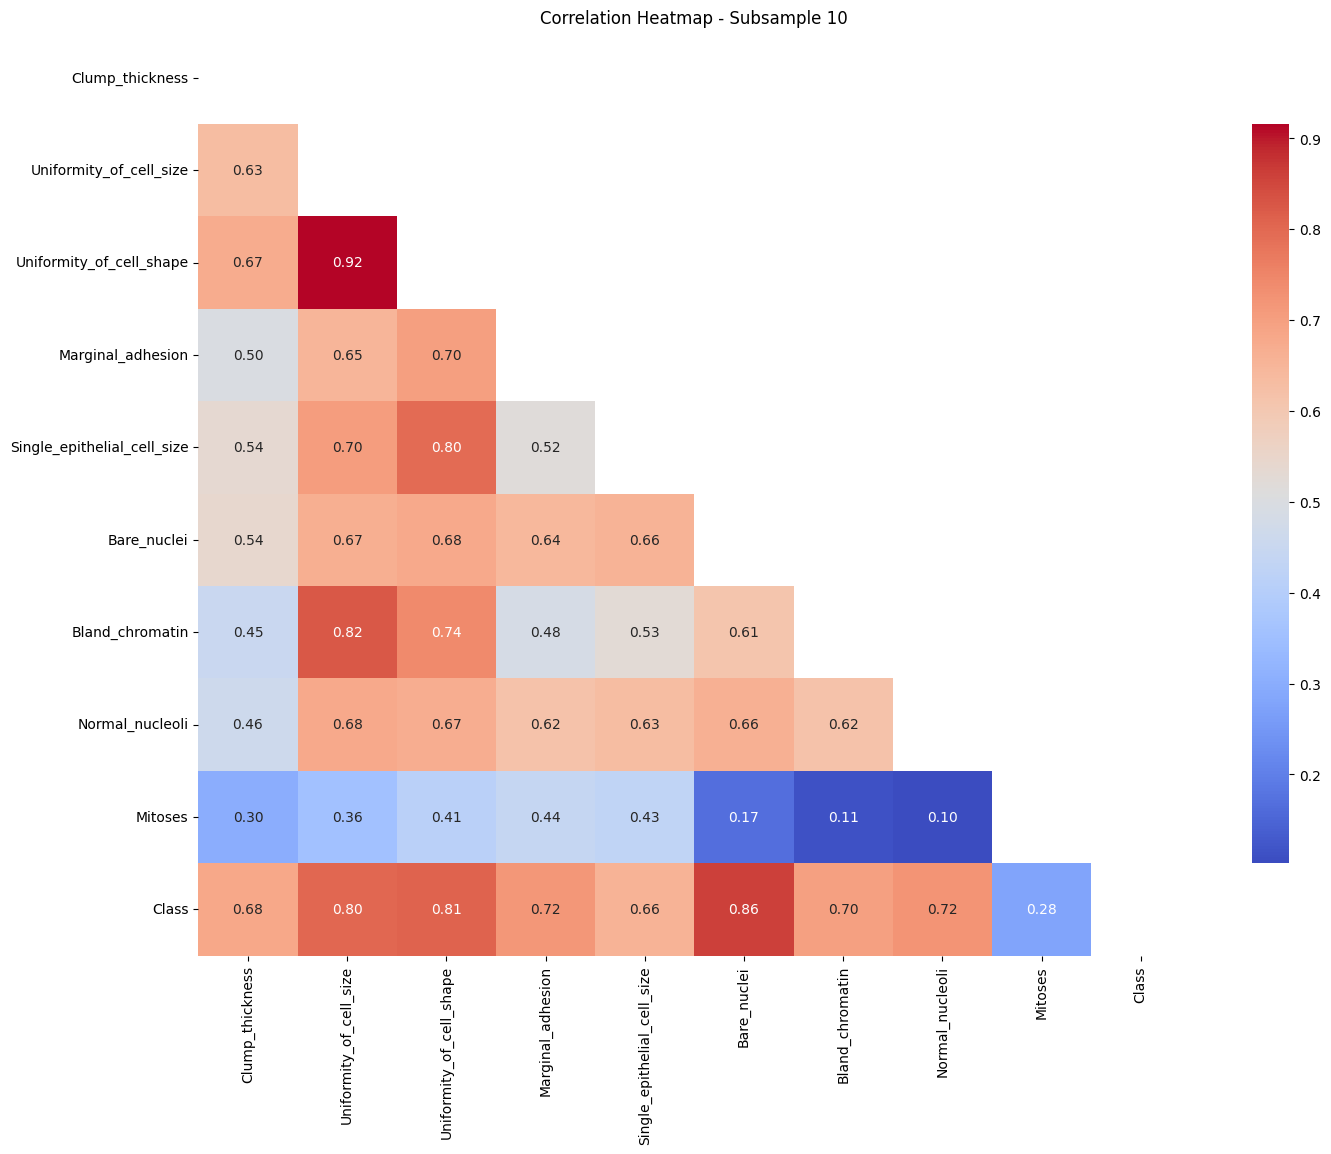

In [25]:
breast_cancer_wisconsin_numeric = data.dropna().select_dtypes(include=[np.number])
num_subsamples = 10
subsample_size = len(breast_cancer_wisconsin_numeric) // num_subsamples
correlation_plots = []

for i in range(num_subsamples):
    subsample_indices = np.random.choice(breast_cancer_wisconsin_numeric.index, size=subsample_size, replace=False)
    subsample = breast_cancer_wisconsin_numeric.loc[subsample_indices]
    correlation_matrix = subsample.corr()
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    
    plt.figure(figsize=(16, 12))
    sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={"shrink": .8})
    plt.title(f'Correlation Heatmap - Subsample {i+1}')
    plt.show()

**TASK (Classification): If your problem is a classification problem visually check if the target variable is imbalanced**
**TASK (Regression): If your problem is a regression problem visually the distribution of your target variabe**

Index(['Clump_thickness', 'Uniformity_of_cell_size',
       'Uniformity_of_cell_shape', 'Marginal_adhesion',
       'Single_epithelial_cell_size', 'Bare_nuclei', 'Bland_chromatin',
       'Normal_nucleoli', 'Mitoses', 'Class'],
      dtype='object')


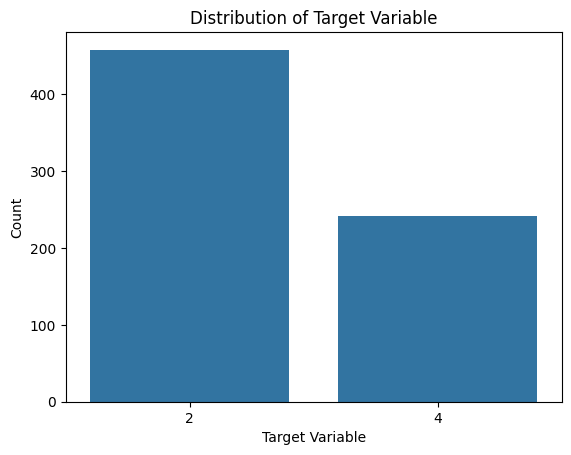

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

print(data.columns)

sns.countplot(x='Class', data=data)
plt.title('Distribution of Target Variable')
plt.xlabel('Target Variable')
plt.ylabel('Count')
plt.show()

**TASK: Take 10 moderately sized subsamples and create a pairplot of the feature variable in relation to the target variable**

<Figure size 1200x1000 with 0 Axes>

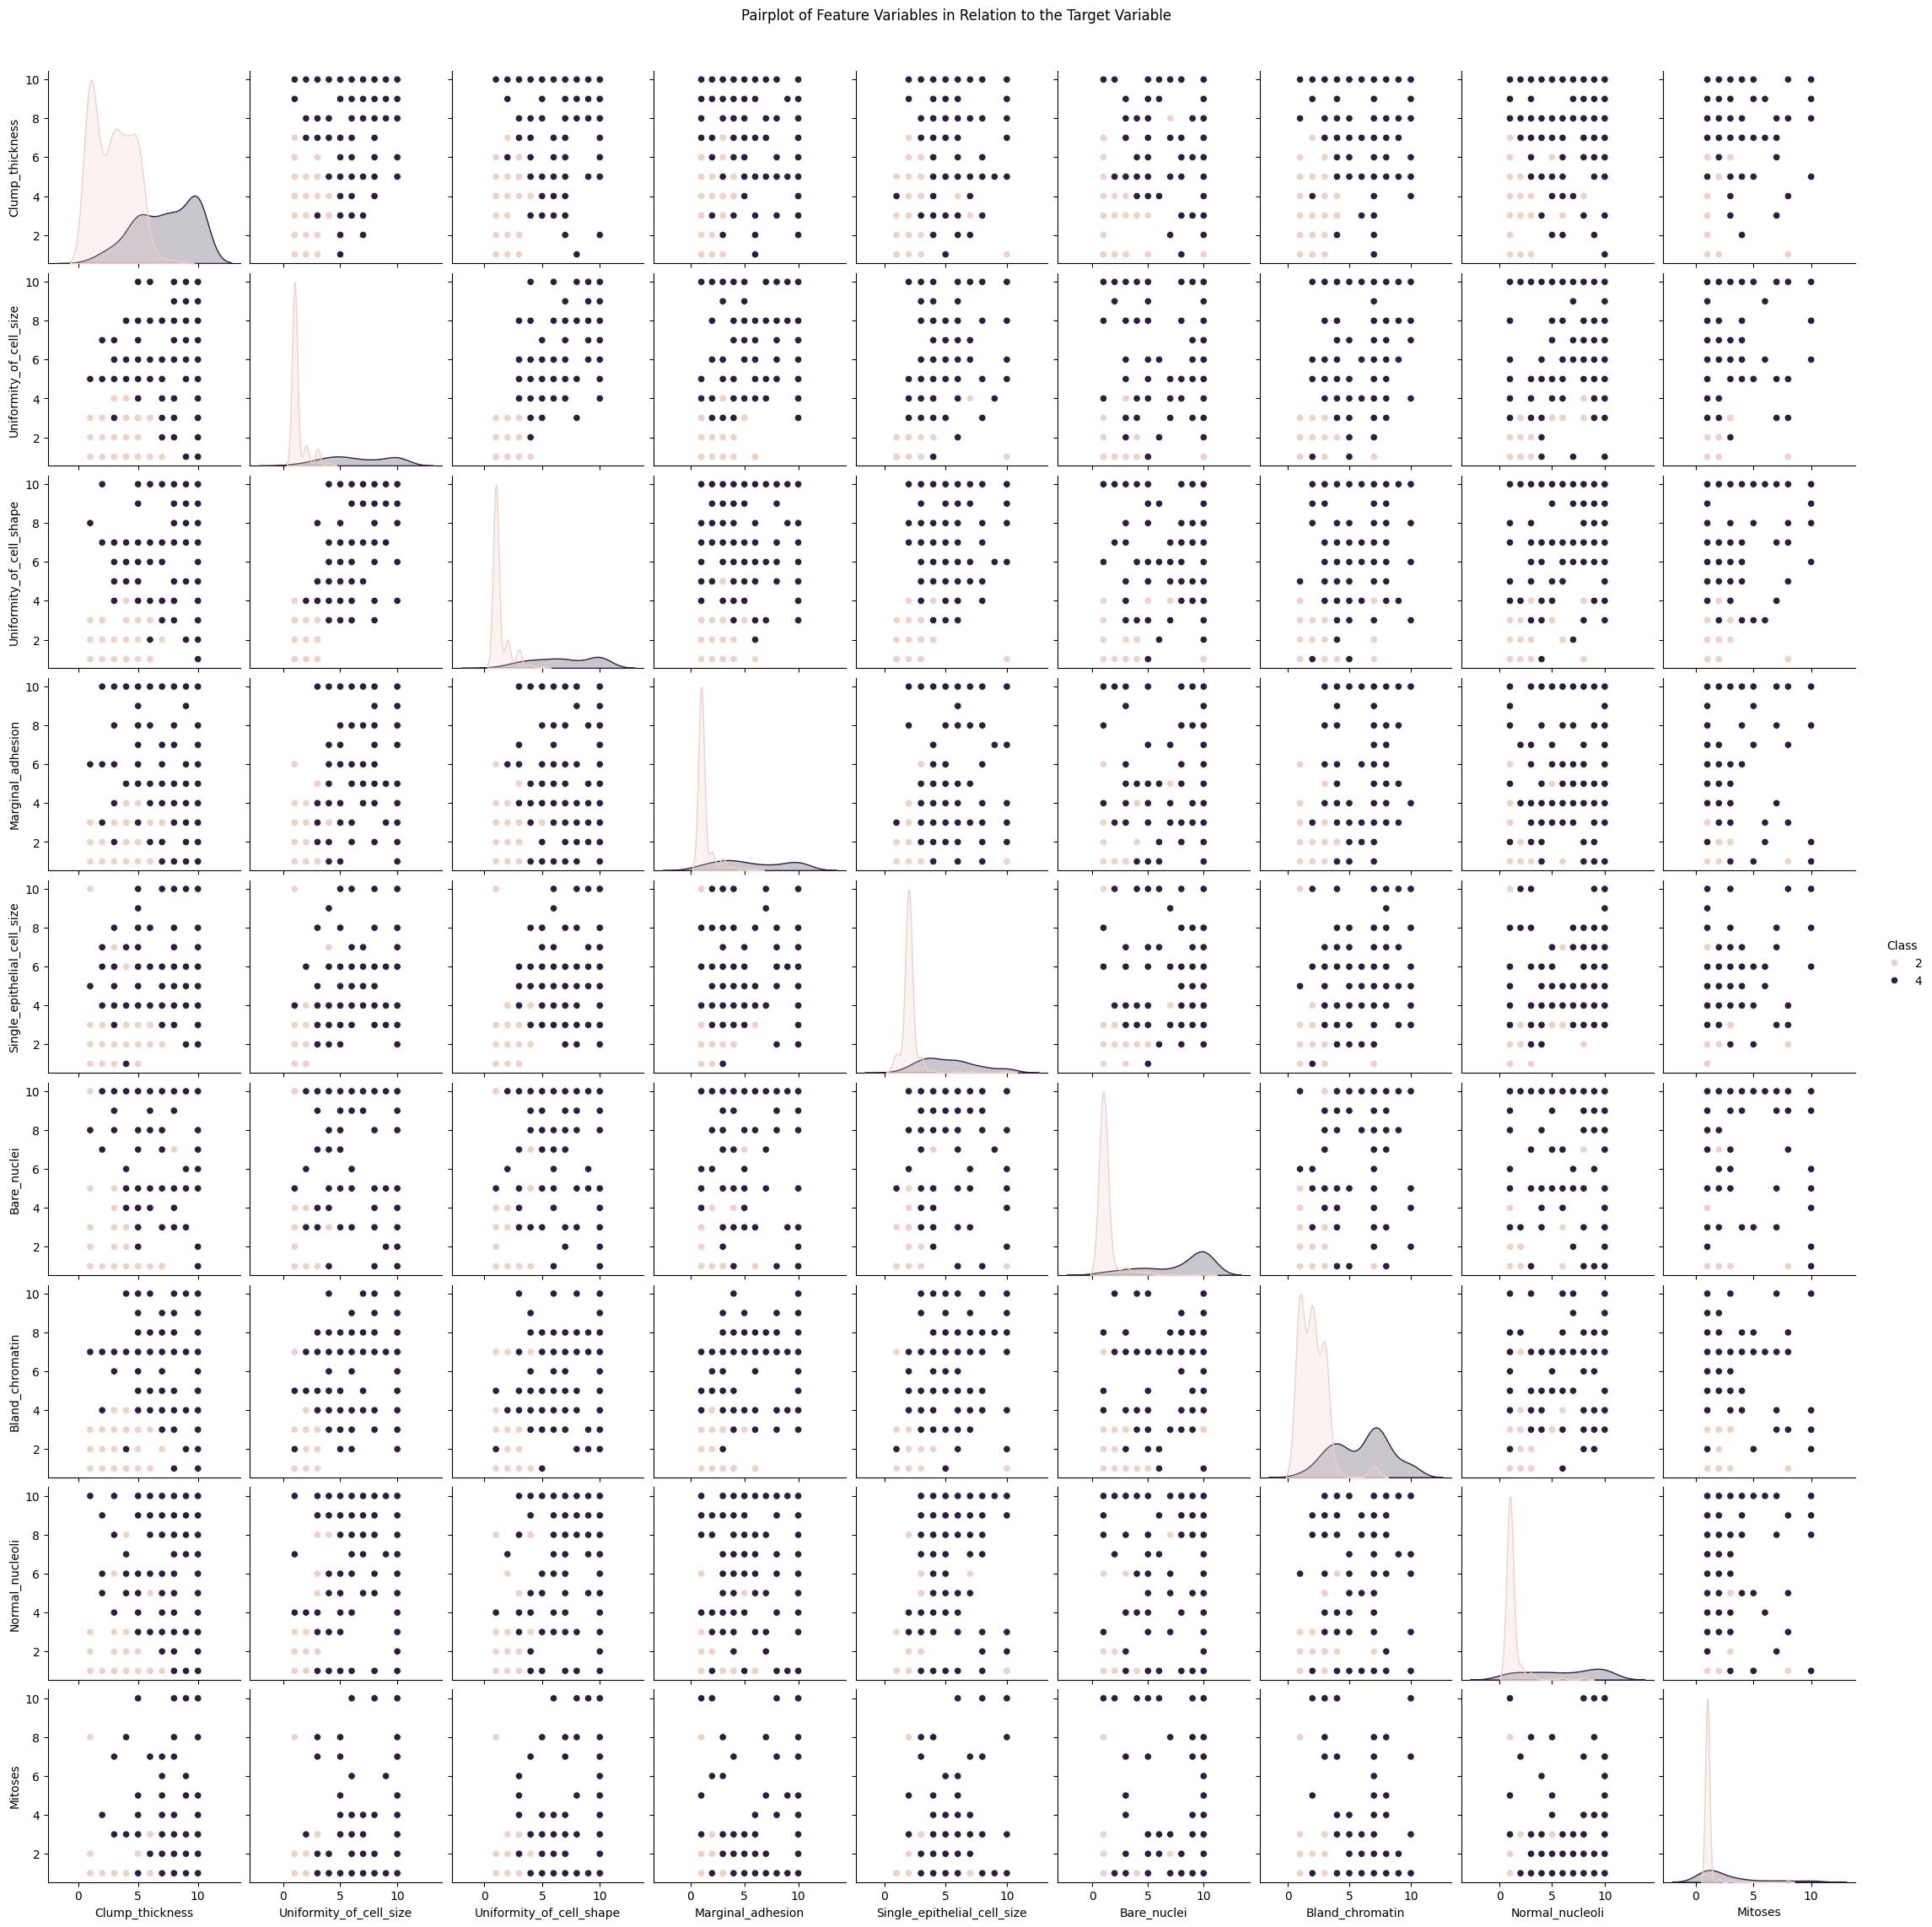

In [27]:
subsample_size = len(breast_cancer_wisconsin_numeric) // 2
subsample_indices = np.random.choice(breast_cancer_wisconsin_numeric.index, size=subsample_size, replace=False)
subsample = breast_cancer_wisconsin_numeric.loc[subsample_indices]

plt.figure(figsize=(12, 10))
sns.pairplot(subsample, hue=y.columns[0], diag_kind='kde')
plt.suptitle('Pairplot of Feature Variables in Relation to the Target Variable', y=1.02)
plt.show()

**TASK: Create a clustermap with seaborn to explore the relationships between variables.**

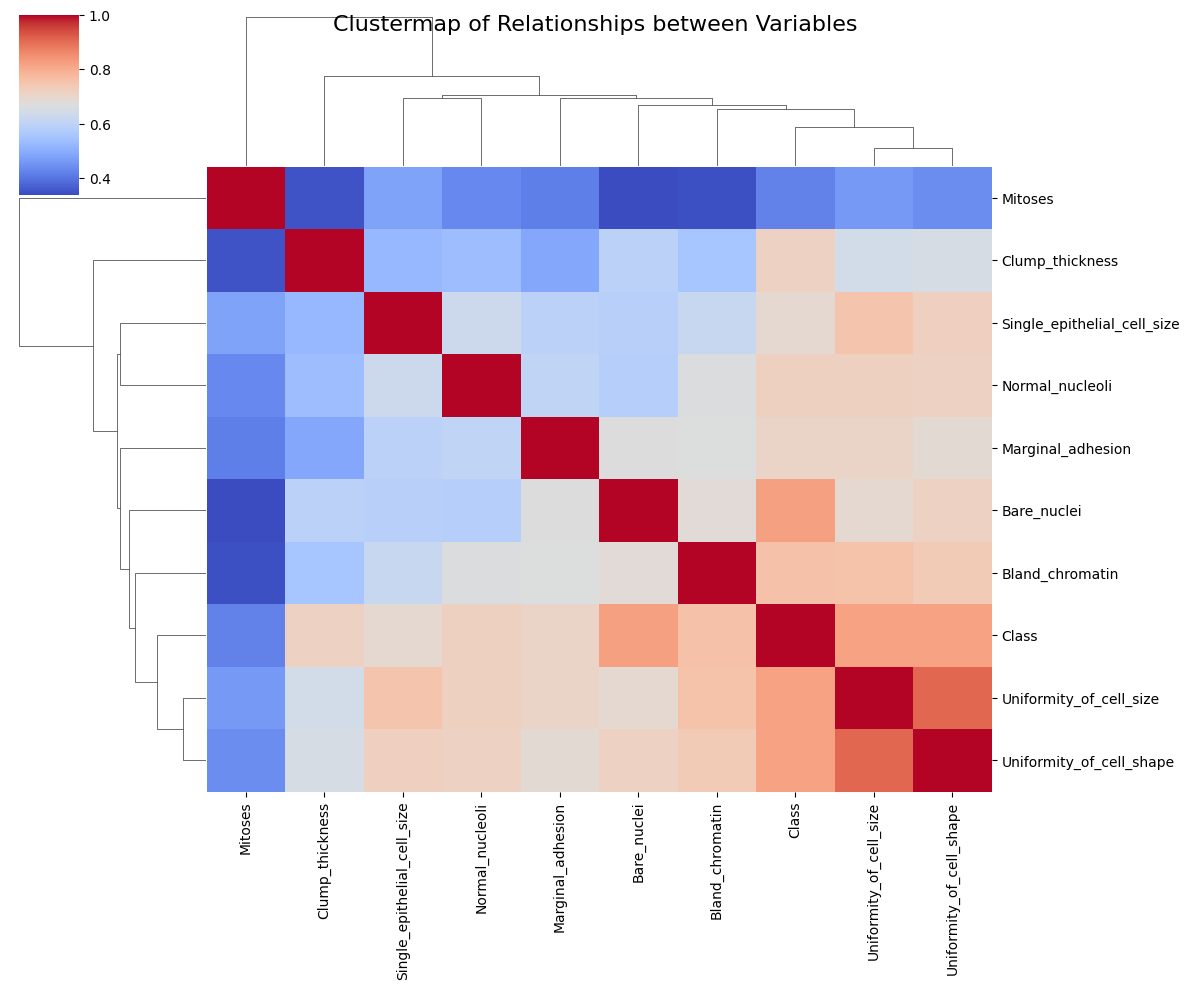

In [28]:
clustermap_fig = sns.clustermap(breast_cancer_wisconsin_numeric.corr(), cmap='coolwarm', figsize=(12, 10))
clustermap_fig.fig.suptitle('Clustermap of Relationships between Variables', fontsize=16)  # Add a figure-level title
plt.show()

**TASK: Perform SVM modelling and check the performance of your model, improve the performance of your model using grdisearch**

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_baseline = SVC()
svm_baseline.fit(X_train, y_train)
baseline_predictions = svm_baseline.predict(X_test)

print("Baseline SVM Model Performance:")
print("Accuracy:", accuracy_score(y_test, baseline_predictions))
print("Classification Report:\n", classification_report(y_test, baseline_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, baseline_predictions))

param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear', 'poly']}
svm_grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)
svm_grid_search.fit(X_train, y_train)

print("Best parameters:", svm_grid_search.best_params_)

best_svm_model = svm_grid_search.best_estimator_
best_svm_model.fit(X_train, y_train)
grid_predictions = best_svm_model.predict(X_test)

print("\nTuned SVM Model Performance:")
print("Accuracy:", accuracy_score(y_test, grid_predictions))
print("Classification Report:\n", classification_report(y_test, grid_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, grid_predictions))

Baseline SVM Model Performance:
Accuracy: 0.948905109489051
Classification Report:
               precision    recall  f1-score   support

           2       0.94      0.97      0.96        79
           4       0.96      0.91      0.94        58

    accuracy                           0.95       137
   macro avg       0.95      0.94      0.95       137
weighted avg       0.95      0.95      0.95       137

Confusion Matrix:
 [[77  2]
 [ 5 53]]
Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV